In [50]:
from astropy.constants import G as _G
import numpy as np
from gala.units import galactic
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline

from scipy.misc import derivative
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [3]:
G = _G.decompose(galactic).value

In [4]:
# Hernquist background potential
m_h = 1E11 # Msun
a = 20. # kpc

# Plummer density profile
m_p = 1E10 # Msun
b = 5 # kpc

In [5]:
def hernquist_r2(phi):
    return (G*m_h/phi)**2 + a**2 + 2*G*m_h*a/phi
hernquist_r2(-0.012)

306.178057162052

In [6]:
def plummer_density(phi):
    r2 = hernquist_r2(phi)
    return 3/(4*np.pi*b**3) * (1+r2/b**2)**-2.5
plummer_density(-0.012)

2.990181252305911e-06

In [7]:
phi = -0.012
derivative(plummer_density, phi, dx=1E-3*phi)

-0.0024684594542348812

In [8]:
def integrand(phi, H):
    dp_dphi = derivative(plummer_density, phi, dx=1E-3*phi)
    return dp_dphi / np.sqrt(phi - H)

In [9]:
some_E = -0.02
phi - some_E

0.008

In [10]:
integrand(phi, some_E)

-0.027598215696856127

In [11]:
quad(integrand, some_E, 0, args=(some_E,))

(-0.04363610998321326, 4.567219498430308e-09)

In [12]:
f = lambda H: quad(integrand, H, 0, args=(H,))[0]
f(some_E)

-0.04363610998321326

In [13]:
some_E = -0.01
derivative(lambda H: quad(integrand, H, 0, args=(H,))[0], some_E, dx=np.abs(1E-4*some_E))

0.024621802819538931

In [45]:
n_df = 128
curlyE = np.linspace(1E-2,1,n_df)
energy_grid = -curlyE * G*m_h/a

df = np.zeros(n_df)
for i,energy in enumerate(energy_grid):
    df[i] = derivative(lambda H: quad(integrand, H, 0, args=(H,))[0], energy, dx=np.abs(1E-4*energy))
    
log_df = np.log(df)

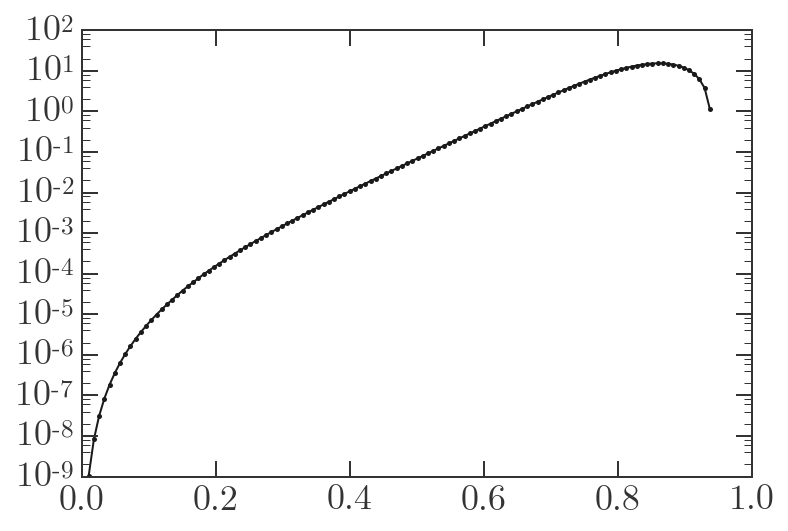

In [46]:
plt.semilogy(curlyE, df)

In [48]:
interp_func = interp1d(energy_grid[np.isfinite(log_df)], log_df[np.isfinite(log_df)])

In [49]:
interp_func(-0.2*G*m_h/a)

array(-8.76152544392065)

In [51]:
# TODO: now sample velocities from the DF...